## Classification Part 1

### Starting out: loading data and libraries
We begin by loading the necessary libraries for the work we are going to do in this lab.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#designate the path where you saved your OEC data
planet_data_path = "planets.csv"

#Load the data using pandas read_csv function. 
orig_data = pd.read_csv(planet_data_path)

print("Setup complete.")

Setup complete.


### The names of the columns we want to use.

not using: `["rowid","kepid","kepoi_name","kepler_name","koi_pdisposition",koi_tce_delivname","koi_tce_delivname"]`

empty cols: `["koi_teq_err1","koi_teq_err2"]`

The koi_disposition will be our target

In [64]:
label = "koi_disposition"
label = orig_data[label]

In [65]:
features_to_use = ["koi_score","koi_fpflag_nt","koi_fpflag_ss","koi_fpflag_co","koi_fpflag_ec",
                   "koi_period","koi_period_err1","koi_period_err2","koi_time0bk","koi_time0bk_err1",
                   "koi_time0bk_err2","koi_impact","koi_impact_err1","koi_impact_err2","koi_duration",
                   "koi_duration_err1","koi_duration_err2","koi_depth","koi_depth_err1","koi_depth_err2",
                   "koi_prad","koi_prad_err1","koi_prad_err2","koi_teq","koi_insol","koi_insol_err1",
                   "koi_insol_err2","koi_model_snr","koi_tce_plnt_num","koi_steff","koi_steff_err1",
                   "koi_steff_err2","koi_slogg","koi_slogg_err1","koi_slogg_err2","koi_srad","koi_srad_err1",
                   "koi_srad_err2","ra","dec","koi_kepmag"]

data = orig_data[features_to_use]
data
data = pd.DataFrame(orig_data[features_to_use])

In [66]:
data.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


### Exploratory data analysis 
Explore the data to gain insights about the data.

View dimensions of dataset

In [67]:
data.shape

(9564, 41)

Describe basic statistics of data

In [68]:
data.describe()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,166.183251,0.009933,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,67.918960,0.023097,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000009,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,0.001240,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,0.010500,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,0.569000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


#### View summary of dataset

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_score          8054 non-null   float64
 1   koi_fpflag_nt      9564 non-null   int64  
 2   koi_fpflag_ss      9564 non-null   int64  
 3   koi_fpflag_co      9564 non-null   int64  
 4   koi_fpflag_ec      9564 non-null   int64  
 5   koi_period         9564 non-null   float64
 6   koi_period_err1    9110 non-null   float64
 7   koi_period_err2    9110 non-null   float64
 8   koi_time0bk        9564 non-null   float64
 9   koi_time0bk_err1   9110 non-null   float64
 10  koi_time0bk_err2   9110 non-null   float64
 11  koi_impact         9201 non-null   float64
 12  koi_impact_err1    9110 non-null   float64
 13  koi_impact_err2    9110 non-null   float64
 14  koi_duration       9564 non-null   float64
 15  koi_duration_err1  9110 non-null   float64
 16  koi_duration_err2  9110 

### Explore problems within variables

#### Missing Value Analysis

Check missing values in variables

In [70]:
data.isnull().sum()

koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad              363
koi_srad_err1         468
koi_srad_err2         468
ra          

#### Impute missing values

The OEC data has various missing values. Pre-process the data to impute some of the missing values, or handle them to use the SimpleImputer now.

In [71]:
from sklearn.impute import SimpleImputer

# The data has both numeric and categorical columns
# Create a SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on your data
data = imputer.fit_transform(data)


#### Exploring the target variable

Target variable is 'koi_disposition' and it is stored in a variable called 'label'

Now check frequency distribution of target variable/class (koi_disposition)

In [72]:
#check how many examples are in each category
label_counts = label.value_counts()
print(label_counts)

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64


We can see that the target variable contains 3 class labels: FALSE POSITIVE, CONFIRMED, CANDIDATE.

Now visualise the target variable distribution using sns.countplot

count               9564
unique                 3
top       FALSE POSITIVE
freq                5023
Name: koi_disposition, dtype: object


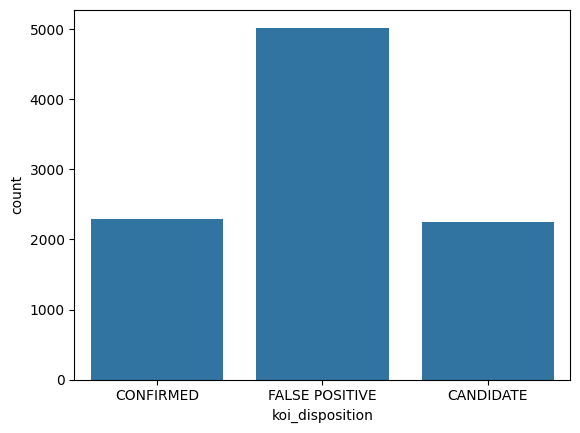

In [73]:
print(label.describe())
label_df = pd.DataFrame({'koi_disposition': label})
sns.countplot(x='koi_disposition', data=label_df)
plt.show()

We've noticed that the target variable is imbalanced, so we'll need to address this issue later on.

### Label Encoding

Transform the set of labels from strings to a suitable encoding such that they can be used with a classifier. 

In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(label)

If the dataset has various categorical columns, consider how I can handle categorical values by generating an alternative encoding. 

#### Correlation Analysis

Convert data from numpy array to a Pandas DataFrame

In [75]:
data=pd.DataFrame(data)
data.columns=[features_to_use]

Create a Correlation Heat Map

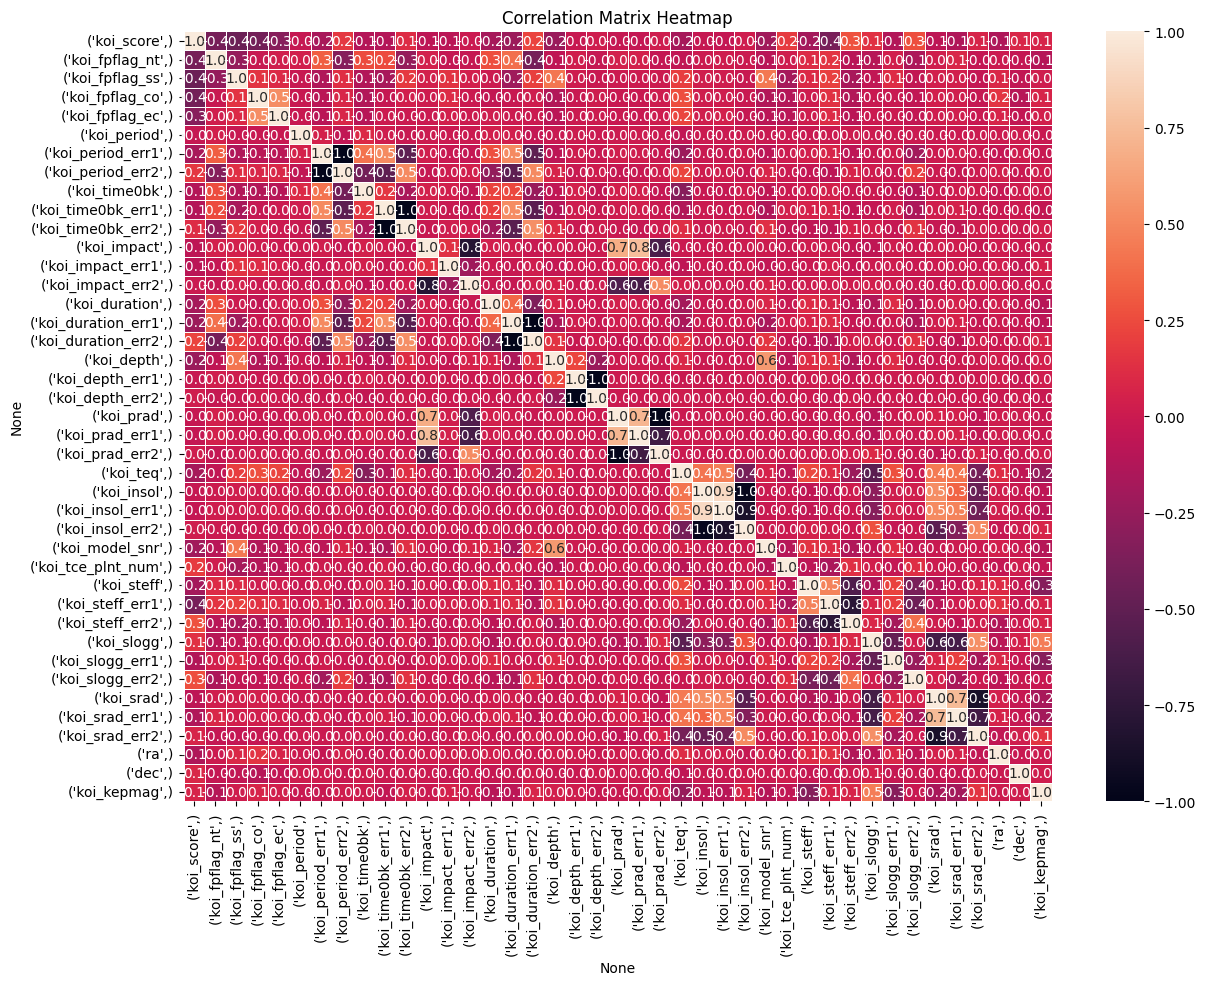

In [76]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
a = sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=.7)

# Set feature names for both axes
a.set_xticklabels(correlation_matrix.columns, rotation=90)
a.set_yticklabels(correlation_matrix.columns)

plt.title('Correlation Matrix Heatmap')
plt.show()

### Split data into separate training and test set 

Split data into separate training and test set using the data and labels you have crafted.

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

y_train

array([2, 2, 0, ..., 2, 0, 2])

### Balancing

Our target variable 'label' is imbalanced, meaning some classes have significantly fewer instances than others. To address this imbalance, we're employing SMOTE (Synthetic Minority Over-sampling Technique), a method that creates synthetic samples for the minority classes to achieve a more balanced dataset.

In [78]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

# Count the occurrences of each class in the training set
#class_counts = y_train.value_counts()
class_counts = np.unique(y_train, return_counts=True)

# Display the class counts before balancing
print("Class Counts Before Balancing:")
print(class_counts)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Count the occurrences of each class after balancing
balanced_class_counts = np.unique(y_train_balanced, return_counts=True)

# Display the class counts after balancing
print("\nClass Counts After Balancing:")
print(balanced_class_counts)


Class Counts Before Balancing:
(array([0, 1, 2]), array([1797, 1839, 4015], dtype=int64))

Class Counts After Balancing:
(array([0, 1, 2]), array([4015, 4015, 4015], dtype=int64))


Now, I have the opportunity to visualize the distribution of the target variable both before and after the balancing process.

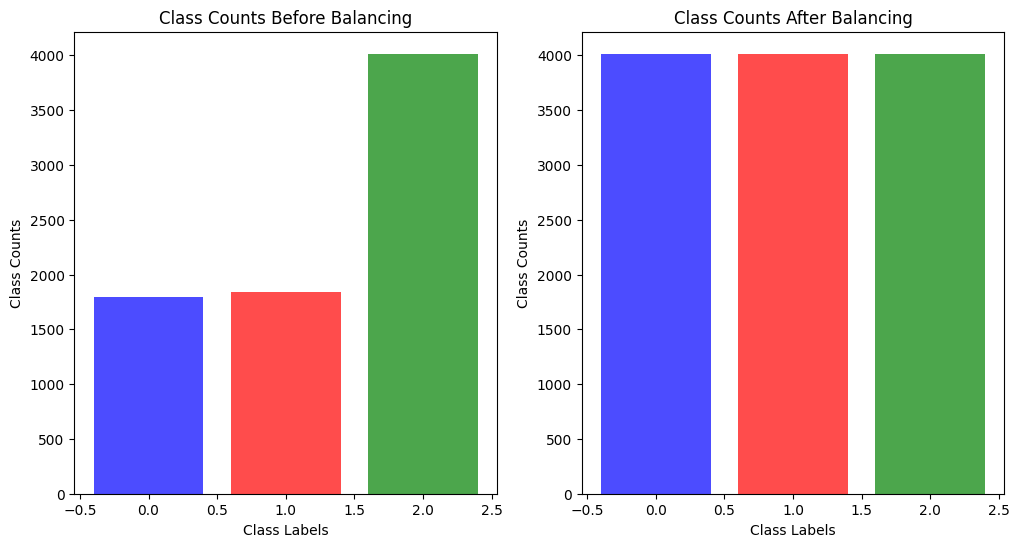

In [79]:
import matplotlib.pyplot as plt

class_labels_before, counts_before = class_counts[0], class_counts[1]
class_labels_after, counts_after = balanced_class_counts[0], balanced_class_counts[1]

# Specify colors for each class
colors_before = ['blue', 'red', 'green']  # Replace with your desired colors
colors_after = ['blue', 'red', 'green']  # Replace with your desired colors

# Plotting class counts before and after balancing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(class_labels_before, counts_before, color=colors_before, alpha=0.7)
ax1.set_title('Class Counts Before Balancing')
ax1.set_xlabel('Class Labels')
ax1.set_ylabel('Class Counts')

ax2.bar(class_labels_after, counts_after, color=colors_after, alpha=0.7)
ax2.set_title('Class Counts After Balancing')
ax2.set_xlabel('Class Labels')
ax2.set_ylabel('Class Counts')

plt.show()


## Classifier 1: k-NN

### 1- For balanced data
Train a k Nearest Neighbours classifier on your dataset, when k=3

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier(n_neighbors=3)

Make predictions on the test set

In [81]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

#### Classifier 1 Model Evaluation:

Evaluate the accuracy, precision, and recall of the classifier: here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# test set (X_test, y_test)
y_pred = knn_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Evaluate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Evaluate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.58
Precision: 0.63
Recall: 0.58


These can be combined here:

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# test set (X_test, y_test)
y_pred = knn_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Evaluate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Evaluate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.58
Precision: 0.63
Recall: 0.58


#### Generate the classification report

In [84]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.46      0.39       451
           1       0.54      0.63      0.58       454
           2       0.81      0.62      0.70      1008

    accuracy                           0.58      1913
   macro avg       0.56      0.57      0.56      1913
weighted avg       0.63      0.58      0.60      1913



### Check for overfitting and underfitting

Now, compare the train-set and test-set accuracy to check for overfitting.

In [85]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn_classifier.score(X_train_balanced, y_train_balanced)))

print('Test set score: {:.4f}'.format(knn_classifier.score(X_test, y_test)))

Training set score: 0.8865
Test set score: 0.5813


Interprete the outcome here:

Training set score (0.8865): This indicates the accuracy or performance of the model on the data it was trained on. A score of 0.8345 suggests that the model performs well on the training data, achieving approximately 88.65% accuracy.

Test set score (0.5813): This represents the accuracy or performance of the model on new, unseen data (the test set). A score of 0.5813 suggests that the model's performance drops when applied to data it hasn't seen before, achieving approximately 58.13% accuracy.

A significant difference between the training and test set scores might indicate overfitting, where the model is too tailored to the training data and doesn't generalize well to new data. Further model evaluation and tuning may be needed to improve test set performance.

#### Use cross-validation to find the best value of k (number of neighbors) for your k-NN classifier.

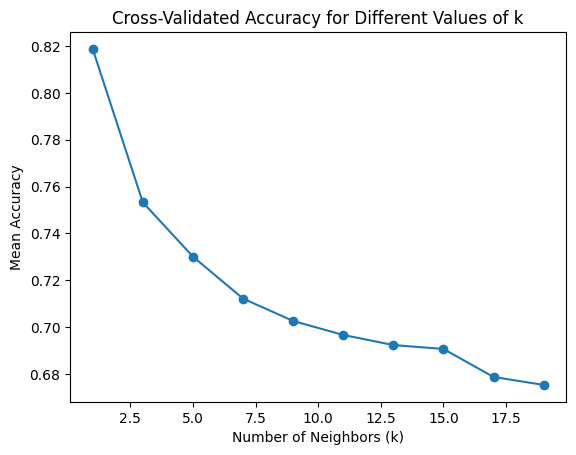

The best value of k is: 1


In [86]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

#your training data and labels loaded in X_train_balanced and y_train_balanced

# Create a range of odd k values to try
k_values = np.arange(1, 21, 2)

# List to store mean accuracy for each k
mean_accuracies = []

# Iterate over each k value
for k in k_values:
    # Create a k-NN classifier with the current k value
    knn_classifier_cv = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation and get mean accuracy
    accuracies = cross_val_score(knn_classifier_cv, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(accuracies)
    
    # Append mean accuracy to the list
    mean_accuracies.append(mean_accuracy)

# Plot the mean accuracy for each k
plt.plot(k_values, mean_accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validated Accuracy for Different Values of k')
plt.show()

# Find the best k value
best_k = k_values[np.argmax(mean_accuracies)]
print(f'The best value of k is: {best_k}')


### 2- For unbalanced data

Use cross-validation to find the best value of k (number of neighbors) for your k-NN classifier for the unbalanced dataset

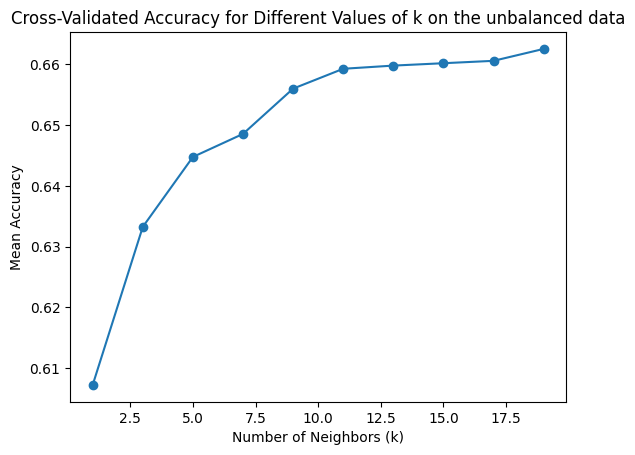

The best value of k for unbalanced dataset is: 19


In [87]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# your training data and labels loaded in X_train and y_train

# Create a range of odd k values to try
k_values = np.arange(1, 21, 2)

# List to store mean accuracy for each k
mean_accuracies = []

# Iterate over each k value
for k in k_values:
    # Create a k-NN classifier with the current k value
    knn_classifier_unbalance = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation and get mean accuracy
    accuracies = cross_val_score(knn_classifier_unbalance, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(accuracies)
    
    # Append mean accuracy to the list
    mean_accuracies.append(mean_accuracy)

# Plot the mean accuracy for each k
plt.plot(k_values, mean_accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validated Accuracy for Different Values of k on the unbalanced data')
plt.show()

# Find the best k value
best_k = k_values[np.argmax(mean_accuracies)]
print(f'The best value of k for unbalanced dataset is: {best_k}')


#### Generate the classification report for the best value of k 

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn_classifier_unbalance = KNeighborsClassifier(n_neighbors=19)

# Train the classifier on the training data
knn_classifier_unbalance.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test data
y_pred = knn_classifier_unbalance.predict(X_test)

# test set (X_test, y_test)
y_pred = knn_classifier_unbalance.predict(X_test)


# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.38      0.49      0.43       451
           1       0.54      0.71      0.62       454
           2       0.84      0.61      0.71      1008

    accuracy                           0.61      1913
   macro avg       0.59      0.61      0.58      1913
weighted avg       0.66      0.61      0.62      1913



### Check for overfitting and underfitting

Now, compare the train-set and test-set accuracy for the unbalanced dataset to check for overfitting.

In [89]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn_classifier_unbalance.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_classifier_unbalance.score(X_test, y_test)))

Training set score: 0.6844
Test set score: 0.6074


## Classifier 2: SVC

Train a SVC classifier on your dataset with default hyperparameters

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.


In [90]:
from sklearn.svm import SVC

svc = SVC()

# Train the classifier on the training data
svc.fit(X_train_balanced, y_train_balanced);

Make predictions on the test set

In [91]:
# Make predictions on the test set
y_pred = svc.predict(X_test)

#### Classifier 2 Model Evaluation:
Once trained your Linear SVC classifier (svc) on the balanced training set, and evaluate its performance on a test set using various metrics such as confusion matrix, accuracy, precision, and recall. Now evaluate your SVC classifier:

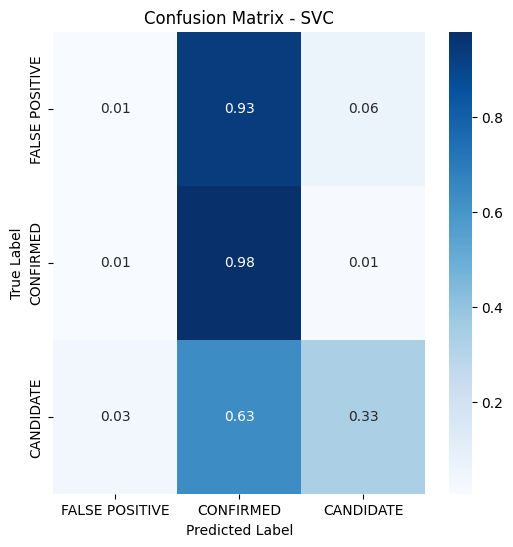

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names=["FALSE POSITIVE", "CONFIRMED", "CANDIDATE"]

# Plot confusion matrix

y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred, normalize='true')
    
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - SVC")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# test set (X_test, y_test)
y_pred = svc.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Evaluate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Evaluate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.41
Precision: 0.57
Recall: 0.41


#### Generate the classification report

In [94]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.10      0.01      0.02       451
           1       0.30      0.98      0.45       454
           2       0.91      0.33      0.49      1008

    accuracy                           0.41      1913
   macro avg       0.43      0.44      0.32      1913
weighted avg       0.57      0.41      0.37      1913



In [95]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Evaluate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.41
Precision: 0.57
Recall: 0.41
Confusion Matrix:
[[  4 420  27]
 [  3 445   6]
 [ 34 639 335]]


### Confusion matrix for all classifiers
Draw confusion matrix for all classifiers

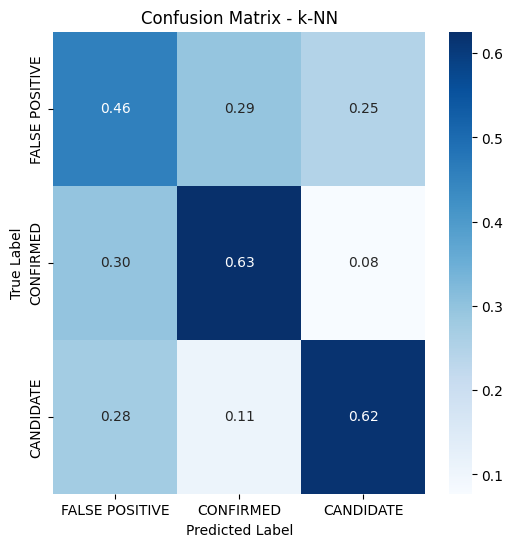

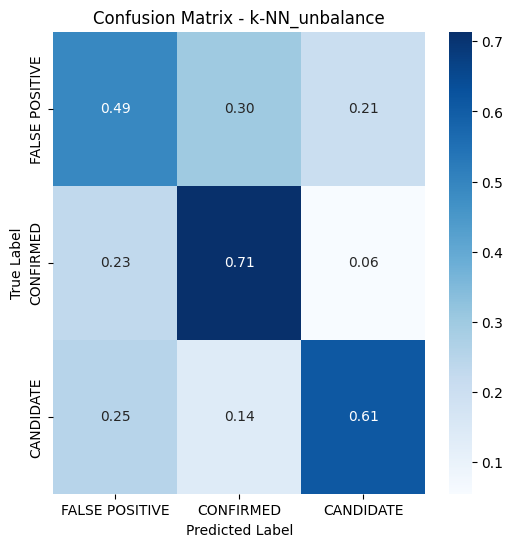

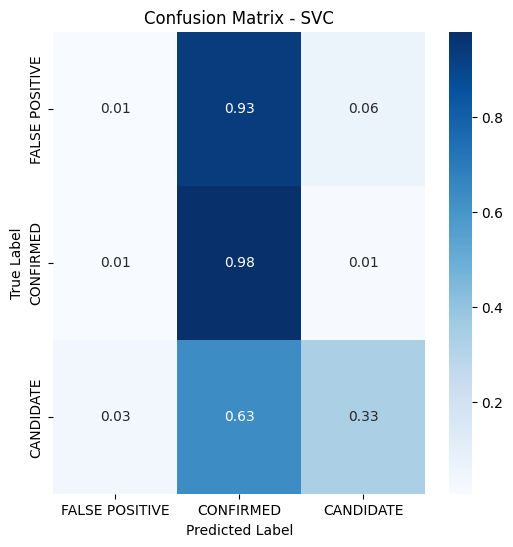

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names=["FALSE POSITIVE", "CONFIRMED", "CANDIDATE"]

classifiers = [knn_classifier,knn_classifier_unbalance, svc]
classifier_names = ['k-NN', 'k-NN_unbalance','SVC']

# Plot confusion matrix for each classifier
for clf, name in zip(classifiers, classifier_names):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


### Compare performance of classifiers

In [98]:
from sklearn.metrics import accuracy_score

classifiers = [knn_classifier, knn_classifier_unbalance, svc]
classifier_names = ['k-NN', 'k-NN_unbalance', 'SVC']

# for each classifier get the test accuracy score
scores = [accuracy_score(clf.predict(X_test), y_test) for clf in classifiers]

# Print classifier names and accuracy scores
for name, score in zip(classifier_names, scores):
    print(f"{name} Test Accuracy: {score}")
    
index = np.argmax(scores)

print("Test Accuracy Scores: ", scores)

print("Best Classifier: ", classifiers[index])
print("Best Accuracy Score: ", scores[index])

k-NN Test Accuracy: 0.5812859383167799
k-NN_unbalance Test Accuracy: 0.6074228959749085
SVC Test Accuracy: 0.40982749607945634
Test Accuracy Scores:  [0.5812859383167799, 0.6074228959749085, 0.40982749607945634]
Best Classifier:  KNeighborsClassifier(n_neighbors=19)
Best Accuracy Score:  0.6074228959749085


As evident from the results, the performance of both classifiers is suboptimal. Next task is to explore alternative analyses with varied parameters for each classifier, experiment with different feature selection techniques, and assess the models using the original unbalanced data. Keep in mind that balancing the data doesn't always guarantee improved performance, so it's crucial to thoroughly investigate various configurations to improve the classifiers' effectiveness.

### Optimizing SVM Classifier

   - Use the SVM classifier (SVC) from scikit-learn.
   - Perform a grid search for hyperparameter optimization using GridSearchCV (cv=3).
   - Use the following hyperparameter combinations:
       - Kernel: 'linear', 'rbf'
       - C: 1.0, 10.0, 100.0
       - Gamma: 'scale'
   - Use a balanced training dataset (X_train_balanced, y_train_balanced).
   - Print the best hyperparameters found by the grid search.
   - Print a classification report for the predictions on the test set.
   

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import time

# Define a small parameter grid
param_dist = {
    'kernel': ['linear', 'rbf'],
    'C': [1.0, 10.0],
    'gamma': ['scale']
}

# Create an SVM classifier
svc = SVC()

# Subsample data for quick testing
subsample_size = 50
X_train_subsampled = X_train_balanced[:subsample_size]
y_train_subsampled = y_train_balanced[:subsample_size]

# Use RandomizedSearchCV for optimization with fewer iterations
start_time = time.time()
random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=5, scoring='accuracy', cv=3, n_jobs=-1)
random_search.fit(X_train_subsampled, y_train_subsampled)
end_time = time.time()

# Get the best parameters
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Get the best estimator
best_svc = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_svc.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the elapsed time
print(f"Elapsed Time: {end_time - start_time} seconds")


C:\Users\91972\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 1.0}
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.48      0.34       451
           1       0.45      0.49      0.47       454
           2       0.72      0.42      0.53      1008

    accuracy                           0.45      1913
   macro avg       0.48      0.46      0.45      1913
weighted avg       0.55      0.45      0.47      1913

Elapsed Time: 156.72678589820862 seconds
